
--- Optimizer: GD ---
Epoch 1: Loss = 0.69
Epoch 2: Loss = 0.69
Epoch 3: Loss = 0.68
Epoch 4: Loss = 0.68
Epoch 5: Loss = 0.67
Epoch 6: Loss = 0.67
Epoch 7: Loss = 0.67
Epoch 8: Loss = 0.66
Epoch 9: Loss = 0.66
Epoch 10: Loss = 0.66
Accuracy: 0.835
Precision: 0.90625
Recall: 0.7837837837837838
F1 Score: 0.8405797101449275
Confusion Matrix:
 [[80  9]
 [24 87]]

--- Optimizer: SGD ---
Epoch 1: Loss = 0.61
Epoch 2: Loss = 0.55
Epoch 3: Loss = 0.51
Epoch 4: Loss = 0.49
Epoch 5: Loss = 0.47
Epoch 6: Loss = 0.45
Epoch 7: Loss = 0.44
Epoch 8: Loss = 0.43
Epoch 9: Loss = 0.42
Epoch 10: Loss = 0.42
Accuracy: 0.825
Precision: 0.8518518518518519
Recall: 0.8288288288288288
F1 Score: 0.8401826484018264
Confusion Matrix:
 [[73 16]
 [19 92]]

--- Optimizer: MBGD ---
Epoch 1: Loss = 0.51
Epoch 2: Loss = 0.44
Epoch 3: Loss = 0.41
Epoch 4: Loss = 0.38
Epoch 5: Loss = 0.37
Epoch 6: Loss = 0.36
Epoch 7: Loss = 0.35
Epoch 8: Loss = 0.35
Epoch 9: Loss = 0.34
Epoch 10: Loss = 0.34
Accuracy: 0.825
Precision:

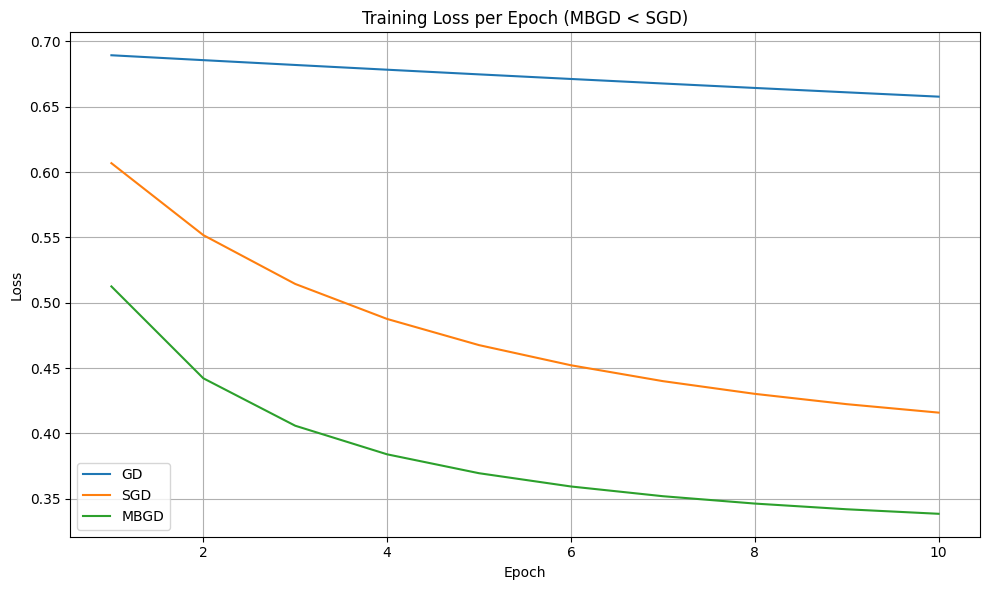

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=10, optimizer='gd', batch_size=32):
        self.lr = lr
        self.epochs = epochs
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        self.losses = []

        for epoch in range(self.epochs):
            if self.optimizer == 'gd':
                self._update(X, y)
            elif self.optimizer == 'mbgd':
                for i in range(0, m, self.batch_size):

                    self._update(X[i:i+self.batch_size], y[i:i+self.batch_size])

            elif self.optimizer == 'sgd':
                for i in range(m):
                        self._update(X[i:i+1], y[i:i+1])

            y_hat = self.predict_proba(X)
            loss = -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))
            self.losses.append(loss)
            print(f"Epoch {epoch+1}: Loss = {loss:.2f}")

    def _update(self, X, y):
        m = len(y)
        y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.sum(y_hat - y) / m
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Generate data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

optimizers = ['gd', 'sgd', 'mbgd']
plt.figure(figsize=(10, 6))

for opt in optimizers:
    print(f"\n--- Optimizer: {opt.upper()} ---")

    if opt == 'mbgd':
        model = LogisticRegression(lr=0.001, epochs=10, optimizer=opt, batch_size=4)
    elif opt == 'sgd':
        model = LogisticRegression(lr=0.01, epochs=10, optimizer=opt)
    else:
        model = LogisticRegression(lr=0.01, epochs=10, optimizer=opt)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    plt.plot(range(1, model.epochs + 1), model.losses, marker='', label=opt.upper())

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch (MBGD < SGD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
